In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd

In [6]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [100]:
#### feature를 컬럼으로 DataFrame 생성
data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)


data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [101]:
## train_test_split 함수를 이용해서 cancer와 target을 섞는다..비율은 8:2
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
## RandomForestClassifier 모델 생성. 결정트리갯수는 100
rfc=RandomForestClassifier(n_estimators=100, random_state=0)
## 학습시킴
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=0)

In [102]:
## Training DataSet Accuracy, Test DataSet Accuracy를 출력함
print('Training DataSet Accuracy : {:3f}' .format(rfc.score(X_train,y_train)))
print('Test DataSet Accuracy : {:3f}' .format(rfc.score(X_test,y_test)))

Training DataSet Accuracy : 1.000000
Test DataSet Accuracy : 0.964912


In [103]:
## 하이퍼 파라미터값을 지정
## max_features=2
## max_depth=5
## 오버핏팅이 다소 줄어들고 정확도가 조금 올라가는 것을 확인하자
rfc=RandomForestClassifier(n_estimators=100, max_depth=5, max_features=2, random_state=0)
rfc.fit(X_train,y_train)
print('Training DataSet Accuracy : {:3f}' .format(rfc.score(X_train,y_train)))
print('Test DataSet Accuracy : {:3f}' .format(rfc.score(X_test,y_test)))

Training DataSet Accuracy : 0.993407
Test DataSet Accuracy : 0.947368


In [104]:
print('특성 중요도:\n{}'.format(rfc.feature_importances_))

특성 중요도:
[0.0298545  0.01797476 0.07681015 0.05198761 0.00968512 0.03329763
 0.07853538 0.07634576 0.00555884 0.00636833 0.04089992 0.0044979
 0.02520987 0.04738528 0.00336297 0.00893158 0.02531315 0.00989085
 0.00524717 0.00527032 0.06265836 0.02187096 0.12819998 0.0499851
 0.01395928 0.03123286 0.04236133 0.06994343 0.00843751 0.00892408]


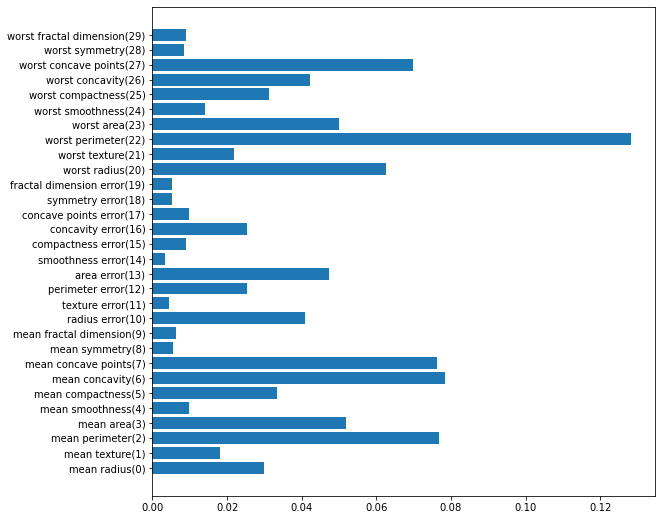

In [105]:
## 특성 중요도를 시각화하자.
fi = rfc.feature_importances_
fn = [n+"("+str(i)+")" for n,i in zip(cancer.feature_names,range(len(cancer.feature_names)))]
plt.figure(figsize=(9,9))
plt.barh(fn, fi)
plt.show()

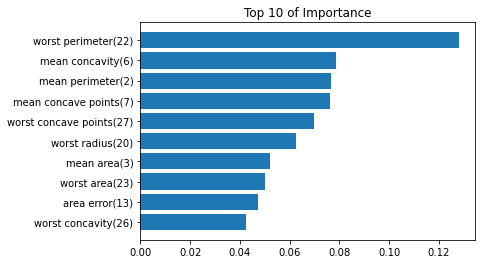

In [111]:
# 중요도 순으로 졍렬해서 시각화
df2 = pd.DataFrame(rfc.feature_importances_, index=fn, columns=['Importance'])
df2_top10=df2.sort_values(by='Importance', ascending=False).head(10)
plt.barh(df2_top10.index[::-1],df2_top10['Importance'].sort_values())
plt.title('Top 10 of Importance')
plt.show()


In [107]:
# max_depths = [1,3,4,6,10,15] 값이 변화됨에 따라서 정확도가 커지는 관계를 출력해보자
for i in [1,3,4,6,10,15]:
    rfc2 = RandomForestClassifier(n_estimators=100, max_depth=i)
    rfc2.fit(X_train,y_train)
    print('max_depth={} 정확도 : {}'.format(i, round(rfc2.score(X_test,y_test),3)))

max_depth=1 정확도 : 0.965
max_depth=3 정확도 : 0.947
max_depth=4 정확도 : 0.947
max_depth=6 정확도 : 0.956
max_depth=10 정확도 : 0.956
max_depth=15 정확도 : 0.965
